IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

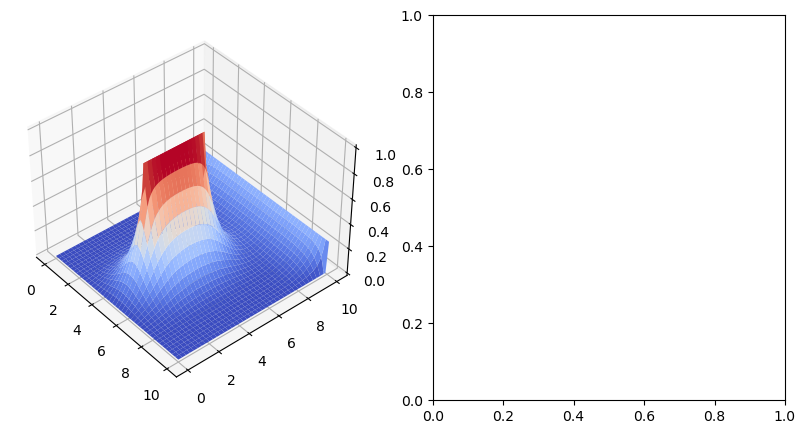

In [4]:
from numpy import array,zeros,copy,pi,linspace,meshgrid,array,any,zeros_like
from matplotlib import pyplot as plt
from matplotlib import cm


class Vgrid:
    def __init__(self,size,V0,Vc):
        self.size = size
        self.V = zeros([size,size]) # initialize voltage 2-dim array
        self.V0 = V0
        self.Vc = Vc

    def setV(self):
        self.V[self.size//5:self.size*3//5,self.size//2] = self.V0
        self.V[-1,:] = self.Vc
        
    def relax(self):
        doLoop = True
        while doLoop:
            Vold = copy(self.V)
            # center values
            self.V[1:-1,1:-1] = 0.25*(self.V[:-2,1:-1] + self.V[2:,1:-1] + self.V[1:-1,:-2] + self.V[1:-1,2:])
            self.setV()

            doLoop = any(self.V - Vold > eps)
    
    def plot(self):
        x = linspace(0,10,self.size)
        y = linspace(0,10,self.size)
        Δx = x[1] - x[0]
        Δy = y[1] - y[0]
        X,Y = meshgrid(x,y)
        
        dxArray = zeros_like(self.V)
        dyArray = zeros_like(self.V)
        dxArray[1:-1,1:-1] = (self.V[1:-1,:-2] - self.V[1:-1,1:-1]) / Δx
        dyArray[1:-1,1:-1] = (self.V[:-2,1:-1] - self.V[1:-1,1:-1]) / Δy
        
        fig = plt.figure(figsize = (10,5))
        ax1 = fig.add_subplot(1,2,1,projection='3d')
        ax1.plot_surface(X,Y,self.V,cmap = cm.coolwarm)
        ax1.view_init(elev = 40,azim = 320)
        
        ax2 = fig.add_subplot(1,2,2)
        ax2.quiver(X[::2,::2],Y[::2,::2],dxArray[::2,::2],dyArray[::2,::2],scale = 9) # make a vector field, based on the functions defined above
        ax2.set_title(f'Rod Voltage: {self.V0}, Conducting Plate Voltage: {self.Vc}')

        plt.show()
    
eps = 10e-4

          # size,V0,Vc
myV = Vgrid(81  ,1 ,0.25)
myV.relax()
myV.plot()

          # size,V0,Vc
myV = Vgrid(81  ,1 ,0.5)
myV.relax()
myV.plot()

          # size,V0,Vc
myV = Vgrid(81  ,1 ,1)
myV.relax()
myV.plot()

          # size,V0,Vc
myV = Vgrid(81  ,1 ,1.5)
myV.relax()
myV.plot()